---
# Sieci neuronowe - projekt 3

---
## Załadowanie bibliotek

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from enum import Enum
from sklearn.metrics import roc_auc_score, roc_curve, auc

---
## Załadowanie danych

In [31]:
temperature_data = pd.read_csv('temperature.csv')
wind_data = pd.read_csv('wind_speed.csv')
humidity_data = pd.read_csv('humidity.csv')
pressure_data = pd.read_csv('pressure.csv')

print(len(temperature_data))
temperature_data = temperature_data[temperature_data['datetime'] <= '2017-10-28']
temperature_data = temperature_data[temperature_data['datetime'] >= '2012-10-02']
wind_data = wind_data[wind_data['datetime'] <= '2017-10-28']
wind_data = wind_data[wind_data['datetime'] >= '2012-10-02']
print(len(temperature_data))


temperature_data = temperature_data.fillna(temperature_data.drop(['datetime'], axis=1).median())
wind_data = wind_data.fillna(wind_data.drop(['datetime'], axis=1).median())
humidity_data = humidity_data.fillna(humidity_data.drop(['datetime'], axis=1).median())
pressure_data = pressure_data.fillna(pressure_data.drop(['datetime'], axis=1).median())

temperature_data_hourly = temperature_data
humidity_data_hourly = humidity_data
pressure_data_hourly = pressure_data
wind_data_hourly = wind_data

temperature_data.head(10)
#wind_data.head(5)
#pressure_data.head(10)

45253
44448


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
12,2012-10-02 00:00:00,284.608607,282.169397,289.331246,281.723376,291.814775,291.632042,293.293499,296.838297,285.948492,...,286.599371,289.040311,285.966046,287.641887,305.174695,303.887401,309.653462,304.4,304.4,303.5
13,2012-10-02 01:00:00,284.606564,282.178011,289.316871,281.715992,291.809434,291.641896,293.282535,296.861275,286.027886,...,286.692988,289.119575,285.979185,287.687467,304.928382,303.843574,309.569231,304.4,304.4,303.5
14,2012-10-02 02:00:00,284.604521,282.186626,289.302496,281.708608,291.804093,291.651750,293.271571,296.884254,286.107279,...,286.786604,289.198838,285.992325,287.733046,304.682069,303.799747,309.485000,304.4,304.4,303.5
15,2012-10-02 03:00:00,284.602477,282.195240,289.288122,281.701224,291.798752,291.661605,293.260606,296.907233,286.186673,...,286.880220,289.278102,286.005465,287.778626,304.435756,303.755921,309.400769,304.4,304.4,303.5
16,2012-10-02 04:00:00,284.600434,282.203855,289.273747,281.693840,291.793411,291.671459,293.249642,296.930212,286.266066,...,286.973837,289.357365,286.018604,287.824205,304.189443,303.712094,309.316538,304.4,304.4,303.5
17,2012-10-02 05:00:00,284.598390,282.212469,289.259372,281.686456,291.788070,291.681313,293.238678,296.953191,286.345459,...,287.067453,289.436629,286.031744,287.869785,303.943130,303.668267,309.232308,304.4,304.4,303.5
18,2012-10-02 06:00:00,284.596347,282.221084,289.244998,281.679072,291.782729,291.691167,293.227714,296.976170,286.424853,...,287.161069,289.515892,286.044883,287.915364,303.696817,303.624440,309.148077,304.4,304.4,303.5
19,2012-10-02 07:00:00,284.594304,282.229698,289.230623,281.671688,291.777387,291.701021,293.216750,296.999148,286.504246,...,287.254686,289.595156,286.058023,287.960944,303.450504,303.580614,309.063846,304.4,304.4,303.5
20,2012-10-02 08:00:00,284.592260,282.238313,289.216248,281.664304,291.772046,291.710875,293.205785,297.022127,286.583640,...,287.348302,289.674419,286.071162,288.006523,303.204191,303.536787,308.979615,304.4,304.4,303.5
21,2012-10-02 09:00:00,284.590217,282.246927,289.201874,281.656920,291.766705,291.720729,293.194821,297.045106,286.663033,...,287.441918,289.753683,286.084302,288.052103,302.957878,303.492960,308.895385,304.4,304.4,303.5


---
## Przetworzenie danych

In [32]:

def calculate_means_by_days(data):
    data['datetime'] = pd.to_datetime(data['datetime'])
    data['date'] = data['datetime'].dt.date
    data = data.drop('datetime', axis=1)
    data = data.groupby('date').mean().reset_index()
    data = data[['date'] + [col for col in data.columns if col != 'date']]

    return data

def check_max_wind_speed_by_days(data):
    data['datetime'] = pd.to_datetime(data['datetime'])
    data['date'] = data['datetime'].dt.date
    data = data.drop('datetime', axis=1)
    data = data.groupby('date').max().reset_index()
    data = data[['date'] + [col for col in data.columns if col != 'date']]

    return data

temperature_data = calculate_means_by_days(temperature_data)
wind_data = check_max_wind_speed_by_days(wind_data)

In [33]:
temperature_data.head(5)

,date,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-02,286.145190,286.137728,292.958306,285.156888,295.890450,295.291472,297.248385,301.211968,289.771821,...,289.239595,290.892389,286.937931,289.013090,302.226773,302.787467,306.759071,303.900000,303.900000,302.675000
1,2012-10-03,285.528125,289.599792,296.929167,287.673958,299.008542,297.878750,300.691875,302.867083,291.205417,...,290.353542,290.065625,287.374583,289.020833,301.194375,301.687917,303.289583,301.561042,301.502500,301.258125
2,2012-10-04,284.373333,286.482500,295.687083,284.391667,295.997917,296.080833,301.820000,302.232917,293.096250,...,293.633750,291.987083,286.860833,290.043750,300.094167,299.940000,301.770208,299.139167,299.139167,298.924167
3,2012-10-05,283.757292,288.286042,290.635417,284.756250,292.948333,293.894375,300.628542,301.811250,292.829167,...,294.015833,294.043542,287.535208,289.517292,299.712083,300.153125,299.860000,298.877500,298.877500,297.547500
4,2012-10-06,284.825833,288.291042,290.010417,285.674583,292.368750,292.814792,299.150625,299.810417,292.885417,...,292.010000,292.953750,288.958125,291.148958,300.152500,299.172083,299.218125,298.542500,298.542500,297.327500


In [34]:
wind_data.head(5)

,date,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-02,0.0,8.0,7.0,2.0,3.0,6.0,5.0,6.0,4.0,...,5.0,6.0,7.0,5.0,6.0,5.0,9.0,6.0,6.0,2.0
1,2012-10-03,11.0,5.0,8.0,6.0,4.0,5.0,4.0,4.0,9.0,...,4.0,5.0,3.0,6.0,3.0,6.0,8.0,6.0,6.0,4.0
2,2012-10-04,3.0,12.0,7.0,8.0,2.0,5.0,6.0,3.0,7.0,...,5.0,3.0,5.0,5.0,4.0,10.0,9.0,5.0,5.0,4.0
3,2012-10-05,2.0,8.0,4.0,6.0,5.0,5.0,7.0,4.0,6.0,...,2.0,4.0,3.0,4.0,6.0,4.0,9.0,4.0,4.0,4.0
4,2012-10-06,2.0,10.0,8.0,6.0,2.0,4.0,5.0,3.0,8.0,...,4.0,4.0,6.0,4.0,6.0,5.0,6.0,4.0,4.0,4.0


---
## Analiza danych

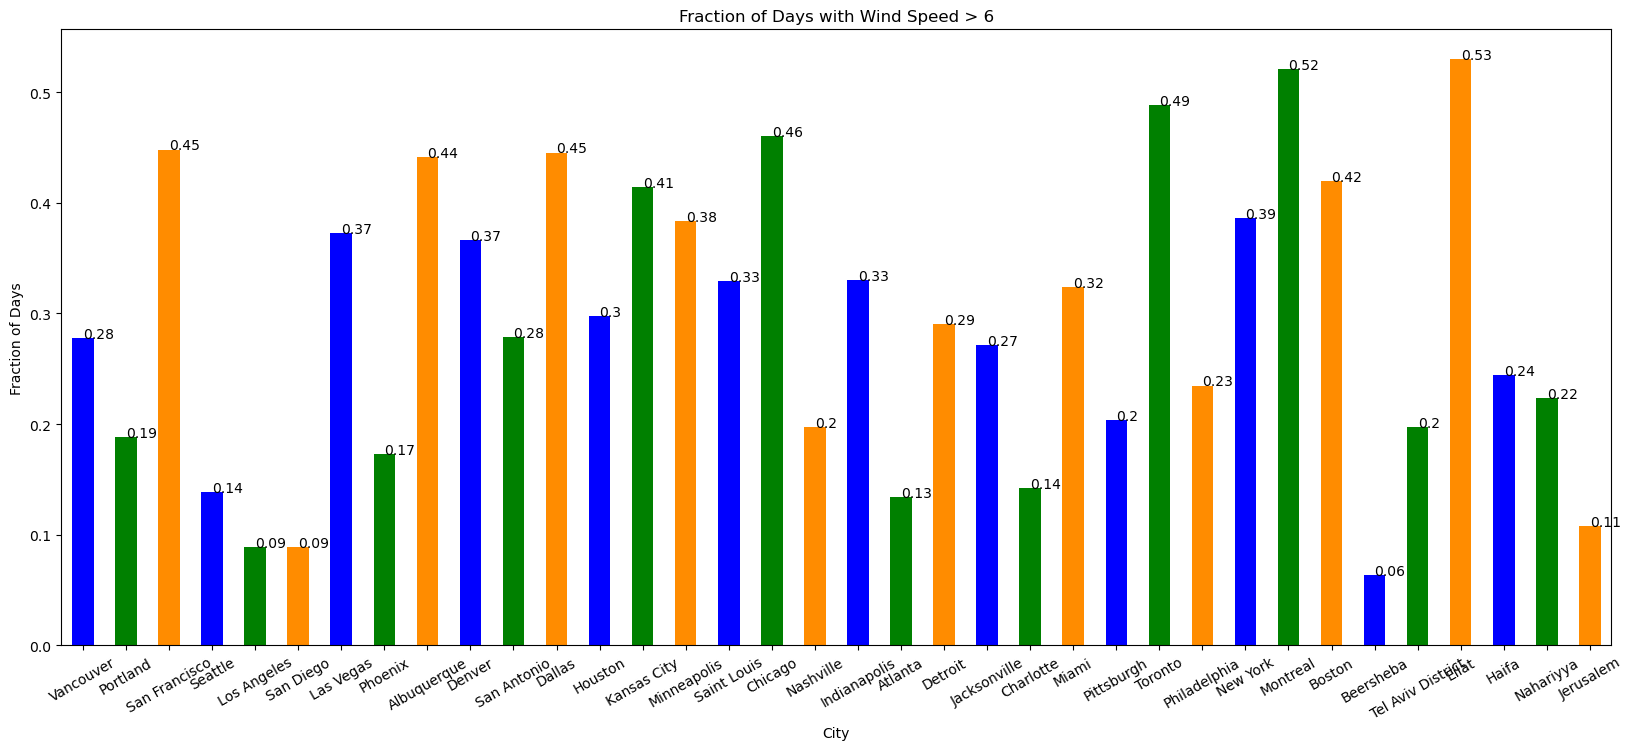

In [35]:
cities = wind_data.columns[1:38]
filtered_df = wind_data.iloc[:,0:38].copy()
filtered_df = filtered_df[cities].apply(lambda col: col > 6)

# Calculate the fraction of days where wind speed was higher than 6 for each city
fractions = filtered_df[cities].mean()

# Plot the fractions
plt.figure(figsize=(20,8))
fractions.plot(kind='bar', rot=30, color=['blue', 'green', 'darkorange'])
for index, value in enumerate(fractions):
    plt.text(index, value, str(np.round(value, 2)))
plt.title('Fraction of Days with Wind Speed > 6')
plt.xlabel('City')
plt.ylabel('Fraction of Days')
plt.show()

In [36]:
temperature_data.describe()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
count,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,...,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000
mean,283.862354,285.050103,288.155195,284.473649,290.841124,290.214190,292.476292,295.532101,285.668929,282.888892,...,285.451016,285.399631,280.432601,283.845115,291.518308,294.509905,296.493735,295.263995,294.092139,293.181679
std,6.188982,6.628438,4.036681,5.888886,5.008908,4.407516,9.837689,8.678297,8.665335,9.549723,...,9.684469,9.738804,11.573407,9.346306,6.251153,5.895067,7.358105,5.832686,5.545874,6.273647
min,265.704433,265.503750,276.120833,267.651250,274.069417,273.191979,268.121500,272.309000,261.457083,253.992438,...,259.223521,259.019750,248.468136,254.865629,275.240827,277.747624,278.738778,281.544011,276.217375,277.578479
25%,279.325201,280.292197,285.413958,280.203542,287.286042,287.118016,284.338443,288.426135,278.943970,276.033215,...,277.835939,277.637292,271.813237,276.315521,286.185146,289.485054,290.312896,290.386718,289.717635,287.817635
50%,283.596452,284.802651,288.087292,284.323866,290.691042,290.018396,291.916469,295.175510,285.969329,283.042917,...,286.173174,286.048292,281.507658,284.386545,292.285979,294.680285,296.935896,295.026509,294.331483,293.510000
75%,289.117292,290.154357,291.067226,289.315787,294.612708,293.567851,301.023050,303.284395,293.283437,291.146247,...,294.126614,294.217292,290.778125,291.820073,297.211413,300.006250,303.002198,299.423760,298.738250,298.108356
max,299.108333,301.780417,302.637500,298.856667,305.517083,304.183750,312.638000,316.038000,308.388000,305.338000,...,303.021250,304.698333,301.150812,301.778542,304.137500,305.344167,310.682042,311.298333,305.934792,305.380000


In [37]:
temperature_data_hourly.describe()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
count,44448.000000,44448.000000,44448.000000,44448.000000,44448.000000,44448.000000,44448.000000,44448.000000,44448.000000,44448.000000,...,44448.000000,44448.000000,44448.000000,44448.000000,44448.000000,44448.000000,44448.000000,44448.000000,44448.000000,44448.000000
mean,283.862354,285.050103,288.155195,284.473649,290.841124,290.214190,292.476292,295.532101,285.668929,282.888892,...,285.451016,285.399631,280.432601,283.845115,291.518308,294.509905,296.493735,295.263995,294.092139,293.181679
std,6.640838,7.495412,5.333137,6.572682,6.496030,5.916045,10.897960,9.977280,9.898266,10.725901,...,10.288303,10.222189,12.014287,9.844145,7.818772,6.675552,8.851428,6.323403,6.302551,7.092682
min,245.150000,262.370000,272.300000,263.780000,266.503667,265.783333,260.561333,266.059000,255.042333,247.727667,...,250.390000,250.774000,243.300000,249.540000,272.179000,271.049000,271.150000,271.150000,268.682000,272.974000
25%,279.160000,279.848093,284.670000,279.872925,286.330000,286.240000,283.870375,287.610000,277.970000,275.090000,...,277.370750,277.370000,272.010000,276.109607,285.366000,289.450000,289.734000,290.466750,289.880658,287.523349
50%,283.448119,284.420000,287.610000,284.050000,290.530000,290.110000,292.120000,295.659333,286.160000,283.060000,...,286.122909,285.869955,281.317500,284.290833,290.930000,294.897328,296.150000,294.820000,294.150000,292.990000
75%,288.603000,289.580000,291.017750,288.610000,295.130000,294.140000,300.960000,303.190000,292.950000,290.766667,...,293.901625,293.760000,290.470000,291.730000,297.264000,299.800000,303.150000,299.655000,298.925250,299.150000
max,307.000000,312.520000,313.620000,307.300000,315.470000,313.360000,318.640000,321.220000,312.710000,313.750000,...,308.000000,310.240000,307.880000,308.000000,314.820000,320.930000,320.150000,320.930000,313.150000,317.040000


In [38]:
std_series = temperature_data.std()
sorted_columns = std_series.sort_values(ascending=False)
sorted_df = temperature_data[sorted_columns.index]

sorted_columns.head(5)

C:\Users\jkobo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Minneapolis    12.381641
Montreal       11.573407
Detroit        10.643755
Chicago        10.610393
Kansas City    10.519183
dtype: float64

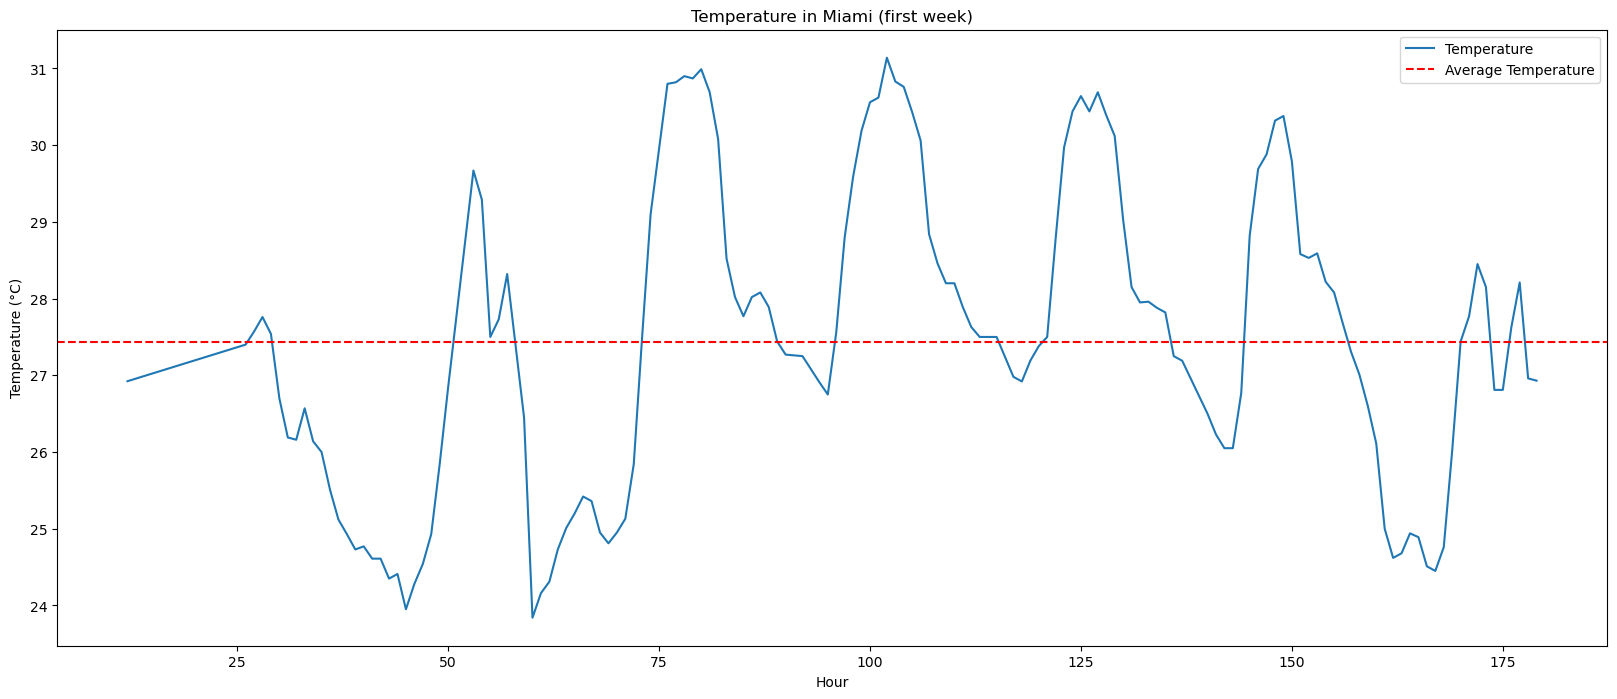

In [69]:
data = (temperature_data_hourly['Miami'] - 273.15).head(24*7)
plt.figure(figsize=(20, 8))
plt.plot(data, label='Temperature')
plt.axhline(y=data.mean(), color='red', linestyle='--', label='Average Temperature')
plt.title('Temperature in Miami (first week)')
plt.xlabel('Hour')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

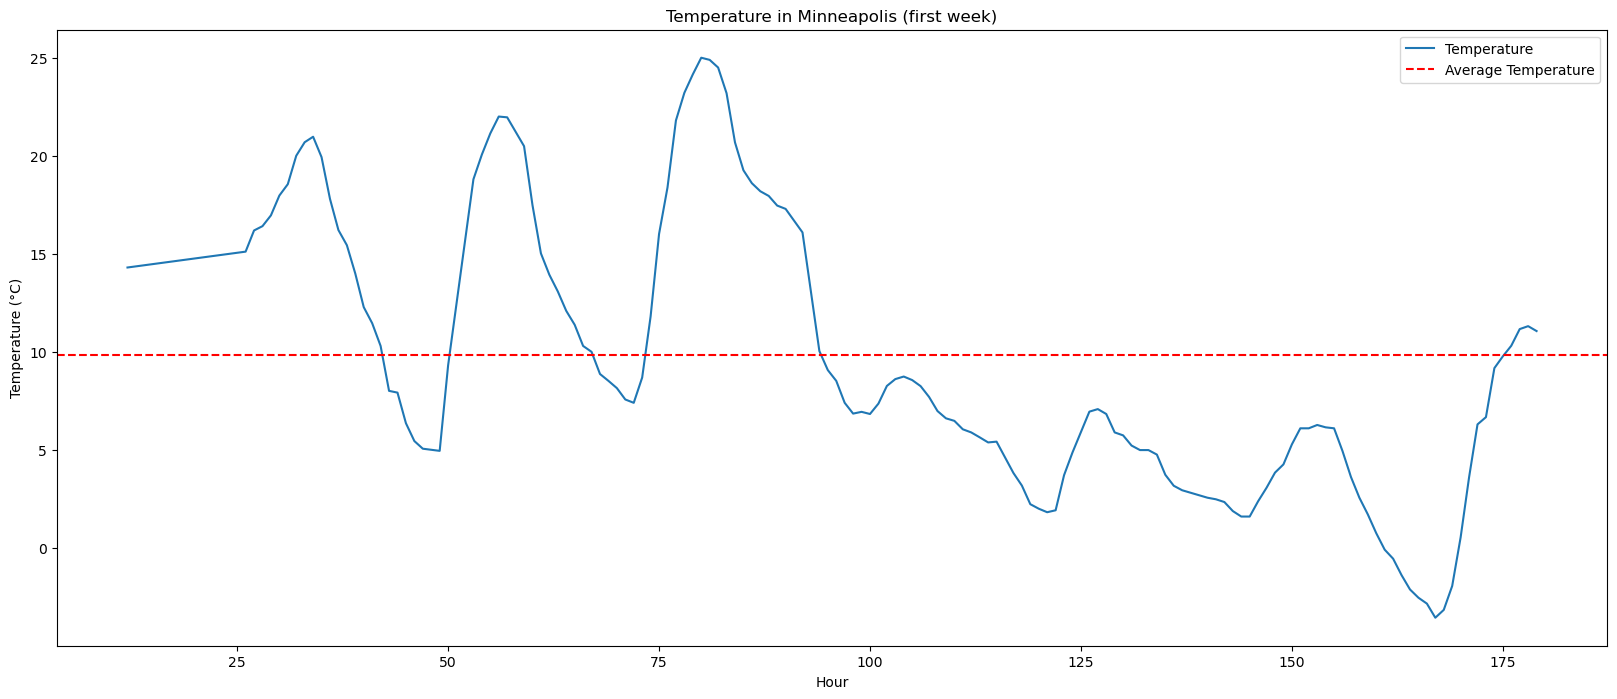

In [70]:
data = (temperature_data_hourly['Minneapolis'] - 273.15).head(24*7)
plt.figure(figsize=(20, 8))
plt.plot(data, label='Temperature')
plt.axhline(y=data.mean(), color='red', linestyle='--', label='Average Temperature')
plt.title('Temperature in Minneapolis (first week)')
plt.xlabel('Hour')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

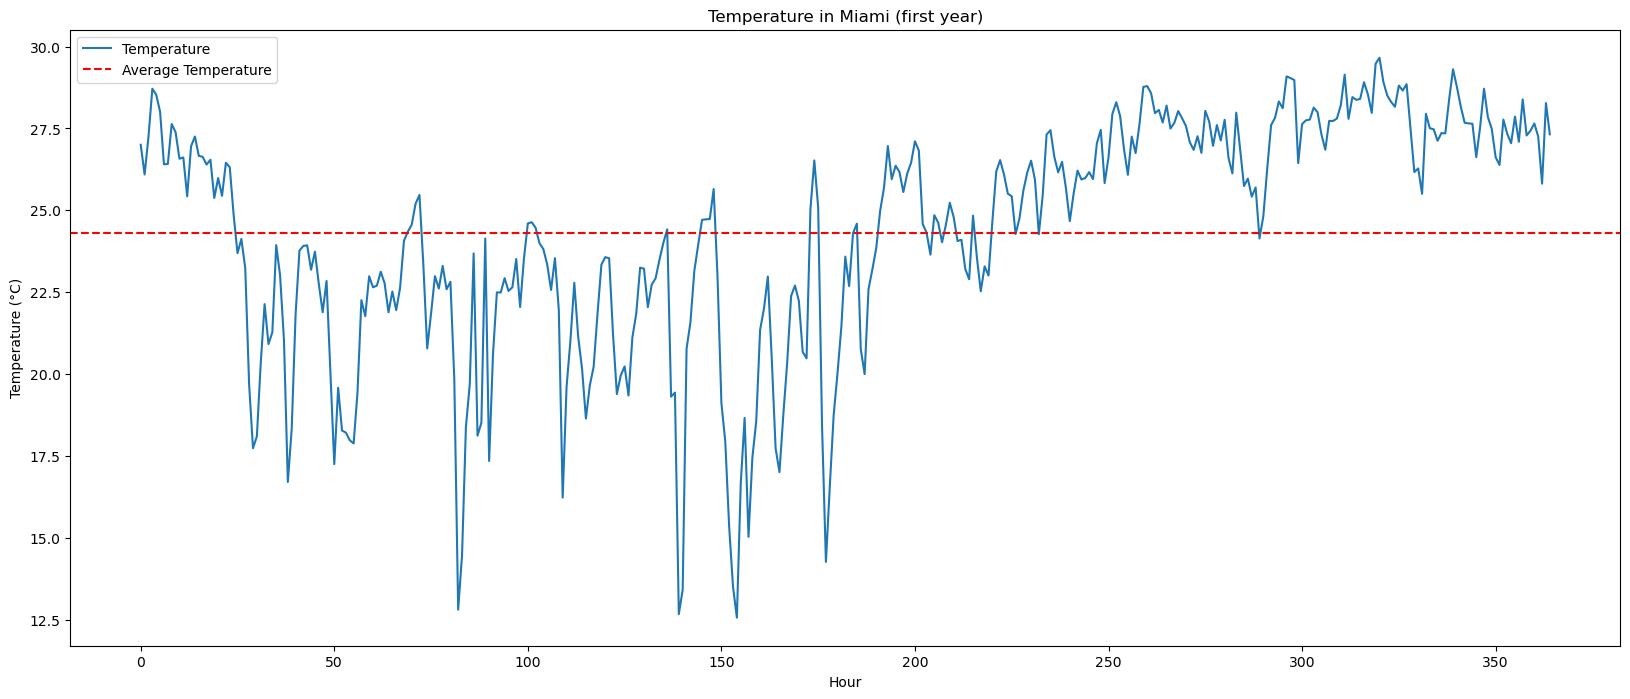

In [76]:
data = (temperature_data['Miami'] - 273.15).head(365)
plt.figure(figsize=(20, 8))
plt.plot(data, label='Temperature')
plt.axhline(y=data.mean(), color='red', linestyle='--', label='Average Temperature')
plt.title('Temperature in Miami (first year)')
plt.xlabel('Hour')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

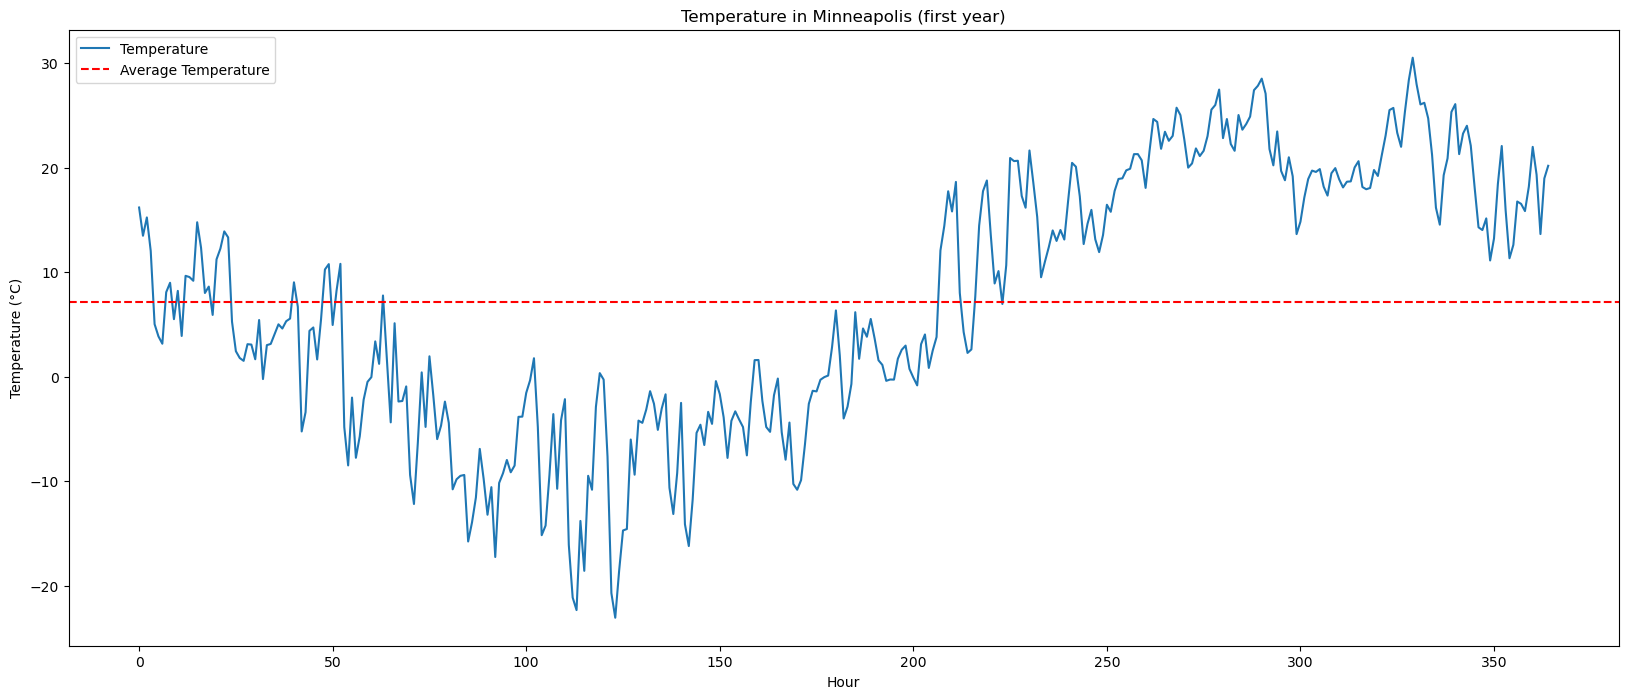

In [75]:
data = (temperature_data['Minneapolis'] - 273.15).head(365)
plt.figure(figsize=(20, 8))
plt.plot(data, label='Temperature')
plt.axhline(y=data.mean(), color='red', linestyle='--', label='Average Temperature')
plt.title('Temperature in Minneapolis (first year)')
plt.xlabel('Hour')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

---
## Funkcje pomocnicze

In [49]:
def DrawData(X, y, plot_name):
    plt.style.use('dark_background')
    plt.figure(figsize=(10,5))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    #plt.subplots_adjust(left=0.20)
    #plt.subplots_adjust(right=0.80)

    plt.scatter(X[0, :], X[1, :], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')

def DrawDataCompare(X, y, y_pred):
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.set(xlabel="$X_1$", ylabel="$X_2$")
    ax1.set_title('Actual labels', fontsize=20)
    ax1.scatter(X[0, :], X[1, :], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    
    ax2.set(xlabel="$X_1$", ylabel="$X_2$")
    ax2.set_title('Predicted labels', fontsize=20)
    ax2.scatter(X[0, :], X[1, :], c=y_pred.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    
    plt.tight_layout()
    plt.show()

def GetClassificationData(name):
    file = pd.read_csv(name, sep=",")

    input = np.array(file[["x", "y"]])
    results = np.array(file["cls"] - 1)

    num_classes = results.max() + 1
    
    return input.T, results.T, num_classes

def get_data_for_city(data, part):
    n = len(data)
    ind = int(n*part)
    data_train = data[:ind].tolist()
    data_test = data[ind+1:].tolist()
    return data_train, data_test

def get_data_for_city_count(data, count):
    ind = count
    data_train = data[:ind].tolist()
    data_test = data[ind+1:].tolist()
    return data_train, data_test

def get_full_data_for_city(data1, data2, data3, part):
    n = len(data1)
    ind = int(n*part)
    data1_train = data1[:ind].tolist()
    data1_test = data1[ind+1:].tolist()
    data2_train = data1[:ind].tolist()
    data2_test = data1[ind+1:].tolist()
    data3_train = data1[:ind].tolist()
    data3_test = data1[ind+1:].tolist()
    return [data1_train, data2_train, data3_train], [data1_test, data2_test, data3_test]

def get_windows_flat(data):
    n = len(data)
    windows_X = []
    windows_y = []

    for i in range(n - 4):
        window = data[i:i+3]
        windows_X.append(window)
        windows_y.append(data[i+4])

    return windows_X, windows_y

def get_windows(data):
    n = len(data[0])
    windows_X = []
    windows_y = []

    for i in range(n - 4):
        currWindow_X = []
        for j in range(3):
            window = data[j][i:i+3]
            currWindow_X += window
        windows_X.append(currWindow_X)
        windows_y.append(data[0][i+4])

    return windows_X, windows_y

def get_windows_hourly(data, data_aggr):
    n = len(data)
    windows_X = []
    windows_y = []

    day_count = int(n/24)
    for i in range(day_count - 4):
        window = data[i*24:(i+3)*24]
        windows_X.append(window)
        windows_y.append(data_aggr[i+4])

    return windows_X, windows_y

def convert_range(data, range_min, range_max):
    old_min = data.min()
    old_max = data.max()
    return (((data - old_min) * (range_max - range_min)) / (old_max - old_min)) + range_min

def calculate_auc(y_pred, y_true):
    auc = roc_auc_score(y_true, y_pred)
    return auc

def convert(x):
  return 1 if x >= 6 else 0

def one_hot(Y):
        one_hot_Y = np.zeros((Y.max() + 1, Y.size))
        one_hot_Y[Y, np.arange(Y.size)] = 1
        return one_hot_Y

def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)

    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


---
## Funkcje aktywacji

In [57]:
class Sigmoid():
    @staticmethod
    def calculate(x):
        x = np.clip( x, -500, 500 )
        return 1 / (1 + np.exp(-x))

    def calculateDeriv(self, x):
        return x * (1 - x)
    
    def getName(self):
        return 'Sigmoid'

    
class ReLU():
    @staticmethod
    def calculate(x):
        return np.maximum(x, 0)
    
    @staticmethod
    def calculateDeriv(x):
        return x > 0
    
    def getName(self):
        return 'ReLU'
    
    
class CrossEntropy():
    @staticmethod
    def calculate(y, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)).mean()

    @staticmethod
    def calculateDeriv(y, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return - (y / y_pred) + (1 - y) / (1 - y_pred)
    
    def getName(self):
        return 'CrossEntropy'
    
class Softmax():
    @staticmethod
    def calculate(x):
        x = np.clip(x, 1e-15, 1 - 1e-15)
        e_x = np.exp(x - np.max(x, axis=0, keepdims=True))
        return e_x / np.sum(e_x, axis=0, keepdims=True)
    
    def calculateDeriv(self, x):
        value = self.calculate(x)
        return value * (1 - value)
    
    def getName(self):
        return 'Softmax'
    
class MSE:
    @staticmethod
    def calculate(y, y_pred):
        return ((y - y_pred) ** 2).mean()
    
    @staticmethod
    def calculateDeriv(y, y_pred):
        return -2*(y - y_pred) / y.shape[0]
    
    def getName(self):
        return 'MSE'
    
class MAE:
    @staticmethod
    def calculate(y, y_pred):
        n = len(y)
        return np.sum(np.abs(y- y_pred)) / n
    
    @staticmethod
    def calculateDeriv(y, y_pred):
        n = len(y)
        return np.sign(y_pred - y) / n
    
    def getName(self):
        return 'MAE'
        

class Tanh:
    @staticmethod
    def calculate(x):
        return np.tanh(x)

    @staticmethod
    def calculateDeriv(x):
        return 1 - x ** 2
    
    def getName(self):
        return 'Tanh'
    
class Linear:
    @staticmethod
    def calculate(x):
        return x

    @staticmethod
    def calculateDeriv(x):
        return np.ones_like(x)
    
    def getName(self):
        return 'Linear'

---
## Sieć neuronowa

In [45]:
class NeuralNetworkStructure:
    def __init__(self, inputSize, outputSize, hiddenLayerSizes, hiddenLayerFunction, outputLayerFunction):
        self.inputSize = inputSize
        self.outputSize = outputSize
        self.hiddenLayerSizes = hiddenLayerSizes
        self.layersSizes = hiddenLayerSizes + [outputSize]
        self.activationFunction = [hiddenLayerFunction] * len(hiddenLayerSizes) + [outputLayerFunction]
        self.layerInput = [None] * len(self.layersSizes)
        self.layerOutput = [None] * len(self.layersSizes)

        self.initializeWeights()

    def initializeWeights(self):
        self.weights = []
        self.bias = []
        
        previousLayerSize = self.inputSize
        for layerSize in self.layersSizes:
            self.weights.append(np.random.rand(layerSize, previousLayerSize) - 0.5)
            self.bias.append(np.random.rand(layerSize, 1) - 0.5)
            previousLayerSize = layerSize
            

class NeuralNetwork:
    def __init__(self, neuralNetworkStructure, epochs, learningRate, lossFunction, batchSize = 0):
        self.structure = neuralNetworkStructure
        self.lossFunction = lossFunction
        self.learningRate = learningRate
        self.epochs = epochs
        self.batchSize = batchSize

    def Forward(self, X):
        previous_layer = X #np.reshape(X, (X.shape[0], 1))
        for id in range(len(self.structure.layersSizes)):
            self.structure.layerInput[id] = self.structure.weights[id].dot(previous_layer) + self.structure.bias[id]
            self.structure.layerOutput[id] = self.structure.activationFunction[id].calculate(self.structure.layerInput[id])
            previous_layer = self.structure.layerOutput[id]
        return previous_layer
    
    
    def Backward(self, X, ExpectedY, PredictedY):
        if ExpectedY.ndim < 2:
            ExpectedY = np.reshape(ExpectedY, (1, -1))
        previous_layer_error = self.lossFunction.calculateDeriv(ExpectedY, PredictedY)
        
        for id in range(len(self.structure.layersSizes) -1, -1, -1):    
            previous_layer_output = self.structure.layerOutput[id - 1] if id != 0 else X
            
            delta = previous_layer_error * self.structure.activationFunction[id].calculateDeriv(self.structure.layerOutput[id])
            deltaW = np.dot(delta, previous_layer_output.T) 
            deltaB = np.sum(delta, axis=1, keepdims=True)
            previous_layer_error = np.dot(self.structure.weights[id].T, delta)
                                        
            self.structure.weights[id] -= self.learningRate * deltaW / ExpectedY.shape[1]
            self.structure.bias[id] -= self.learningRate * deltaB / ExpectedY.shape[1]
    
    def one_hot(self, Y):
        one_hot_Y = np.zeros((Y.max() + 1, Y.size))
        one_hot_Y[Y, np.arange(Y.size)] = 1
        return one_hot_Y
    
    def Train(self, X, ExpectedY):
   
        predictedY = self.Forward(X)
        self.Backward(X, ExpectedY, predictedY)
    
    def Test(self, train_inputs, train_results, test_inputs, schuffleParts = True):
        train_inputs = np.array(train_inputs).T
        train_results = np.array(train_results).T
        test_inputs = np.array(test_inputs).T
        
        if self.batchSize != 0:
            partsCount = (int)(np.shape(train_inputs)[1] / self.batchSize)
        else:
            partsCount = 1
        
        inputParts = np.array_split(train_inputs, partsCount, 1)
        if train_results.ndim < 2:
            resultsParts = np.array_split(train_results, partsCount, 0)
        else:
            resultsParts = np.array_split(train_results, partsCount, 1)
        
        for epoch in range(self.epochs):
            parts_range = list(range(partsCount))
            
            if schuffleParts == True:
                np.random.shuffle(parts_range)
        
            for i in parts_range:
                self.Train(inputParts[i], resultsParts[i])
            
        return self.Forward(test_inputs) 
    
    def Predict(self, test_inputs):
        predictedY = self.Forward(test_inputs)
        return predictedY


---
# Regresja

In [131]:
cities = temperature_data.columns[1:]
accs = []
bads = []
max_errors = []
avg_errors = []

for city in cities:

    np.random.seed(0)

    prev_min = temperature_data[city].min()
    prev_max = temperature_data[city].max()

    temperature_data_converted = convert_range(temperature_data[city], -1, 1)
    humidity_data_converted = convert_range(humidity_data[city], -1, 1)
    pressure_data_converted = convert_range(pressure_data[city], -1, 1)

    data_train, data_test = get_full_data_for_city(temperature_data_converted, humidity_data_converted, pressure_data_converted, 0.7)

    train_windows_X, train_windows_y = get_windows(data_train)
    test_windows_X, test_windows_y = get_windows(data_test)

    nnS = NeuralNetworkStructure(
        inputSize = 9, 
        outputSize = 1, 
        hiddenLayerSizes = [32], 
        hiddenLayerFunction = ReLU(), 
        outputLayerFunction = Linear())

    nn = NeuralNetwork(  
        epochs = 1000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = MAE(),
        batchSize=32)

    predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)

    converted = convert_range(np.array(test_windows_y), prev_min, prev_max)
    predictedPoints = convert_range(np.array(predictedPoints), prev_min, prev_max)

    diff = converted - predictedPoints[0]
    err = abs(diff)

    accs.append(np.sum(err <= 2)/len(err))
    bads.append(np.sum(err >= 6)/len(err))
    max_errors.append(np.max(err))
    avg_errors.append(np.mean(err))

print(f'Average accuracy: {np.mean(accs).round(2)}')
print(f'Average percentage of very bad predictions: {np.mean(bads).round(2)}')
print(f'Average max error: {np.mean(max_errors).round(2)}')
print(f'Average error: {np.mean(avg_errors).round(2)}')

Average accuracy: 0.43
Average percentage of very bad predictions: 0.16
Average max error: 17.51
Average error: 3.35



## Regresja - przewidywanie temperatury - uśrednione wejście

In [129]:
cities = ['Miami', 'Jerusalem', 'Los Angeles', 'Tel Aviv District', 'Haifa']

for city in cities:

    np.random.seed(0)

    prev_min = temperature_data[city].min()
    prev_max = temperature_data[city].max()

    temperature_data_converted = convert_range(temperature_data[city], -1, 1)
    humidity_data_converted = convert_range(humidity_data[city], -1, 1)
    pressure_data_converted = convert_range(pressure_data[city], -1, 1)

    data_train, data_test = get_full_data_for_city(temperature_data_converted, humidity_data_converted, pressure_data_converted, 0.7)

    train_windows_X, train_windows_y = get_windows(data_train)
    test_windows_X, test_windows_y = get_windows(data_test)

    nnS = NeuralNetworkStructure(
        inputSize = 9, 
        outputSize = 1, 
        hiddenLayerSizes = [32], 
        hiddenLayerFunction = ReLU(), 
        outputLayerFunction = Linear())

    nn = NeuralNetwork(  
        epochs = 1000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = MAE(),
        batchSize=32)

    predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)

    converted = convert_range(np.array(test_windows_y), prev_min, prev_max)
    predictedPoints = convert_range(np.array(predictedPoints), prev_min, prev_max)

    diff = converted - predictedPoints[0]
    err = abs(diff)

    print(f'City: {city}')
    print(f'Correct predictions [error <= 2]: {np.sum(err <= 2)}/{len(err)}, {np.round(np.sum(np.sum(err <= 2))/len(err)*100, 2)}%')
    print(f'Bad predictions [error >= 6]: {np.sum(err >= 6)}/{len(err)}, {np.round(np.sum(np.sum(err >= 6))/len(err)*100, 2)}%')
    print(f'Max error: {np.max(err).round(2)}')
    print(f'Avg error: {np.mean(err).round(2)}')

City: Miami
Correct predictions [error <= 2]: 405/551, 73.5%
Bad predictions [error >= 6]: 16/551, 2.9%
Max error: 12.47
Avg error: 1.61
City: Jerusalem
Correct predictions [error <= 2]: 444/551, 80.58%
Bad predictions [error >= 6]: 17/551, 3.09%
Max error: 8.72
Avg error: 1.37
City: Los Angeles
Correct predictions [error <= 2]: 333/551, 60.44%
Bad predictions [error >= 6]: 24/551, 4.36%
Max error: 11.38
Avg error: 2.15
City: Tel Aviv District
Correct predictions [error <= 2]: 416/551, 75.5%
Bad predictions [error >= 6]: 19/551, 3.45%
Max error: 8.66
Avg error: 1.58
City: Haifa
Correct predictions [error <= 2]: 380/551, 68.97%
Bad predictions [error >= 6]: 15/551, 2.72%
Max error: 13.97
Avg error: 1.72


## Regresja - przewidywanie temperatury - dokładne wejście

In [98]:
import numpy as np
import pandas as pd

cities = ['Miami', 'Jerusalem', 'Los Angeles', 'Tel Aviv District', 'Haifa']

for city in cities:

    np.random.seed(0)

    prev_min = temperature_data[city].min()
    prev_max = temperature_data[city].max()

    temperature_data_converted = convert_range(temperature_data[city], -1, 1)
    temperature_data_hourly_converted = convert_range(temperature_data_hourly[city], -1, 1)
    data_train, data_test = get_data_for_city(temperature_data_converted, 0.7)

    data_train_hourly, data_test_hourly = get_data_for_city_count(temperature_data_hourly_converted, len(data_train)*24)

    train_windows_X, train_windows_y = get_windows_hourly(data_train_hourly, data_train)
    test_windows_X, test_windows_y = get_windows_hourly(data_test_hourly, data_test)

    nnS = NeuralNetworkStructure(
        inputSize = 72, 
        outputSize = 1, 
        hiddenLayerSizes = [32], 
        hiddenLayerFunction = ReLU(), 
        outputLayerFunction = Linear())

    nn = NeuralNetwork(  
        epochs = 1000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = MAE(),
        batchSize=32)

    predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)
    predictedPoints

    converted = convert_range(np.array(test_windows_y), prev_min, prev_max)
    predictedPoints = convert_range(np.array(predictedPoints), prev_min, prev_max)

    diff = converted - predictedPoints[0]
    err = abs(diff)

    predictedPoints
    print(f'City: {city}')
    print(f'Correct predictions [error <= 2]: {np.sum(err <= 2)}/{len(err)}, {np.round(np.sum(np.sum(err <=2))/len(err)*100, 2)}%')
    print(f'Max error: {np.max(err).round(2)}')
    print(f'Avg error: {np.mean(err).round(2)}')

City: Miami
Correct predictions [error <= 2]: 338/551, 61.34%
Max error: 13.17
Avg error: 2.08
City: Jerusalem
Correct predictions [error <= 2]: 393/551, 71.32%
Max error: 13.37
Avg error: 1.68
City: Los Angeles
Correct predictions [error <= 2]: 288/551, 52.27%
Max error: 14.59
Avg error: 2.64
City: Tel Aviv District
Correct predictions [error <= 2]: 390/551, 70.78%
Max error: 9.42
Avg error: 1.71
City: Haifa
Correct predictions [error <= 2]: 362/551, 65.7%
Max error: 12.81
Avg error: 1.86


## Porównanie funkcji kosztu

In [104]:
import numpy as np
import pandas as pd

cities = ['Miami', 'Jerusalem', 'Los Angeles', 'Tel Aviv District', 'Haifa']

for city in cities:

    np.random.seed(0)

    prev_min = temperature_data[city].min()
    prev_max = temperature_data[city].max()

    temperature_data_converted = convert_range(temperature_data[city], -1, 1)
    humidity_data_converted = convert_range(humidity_data[city], -1, 1)
    pressure_data_converted = convert_range(pressure_data[city], -1, 1)

    data_train, data_test = get_full_data_for_city(temperature_data_converted, humidity_data_converted, pressure_data_converted, 0.7)

    train_windows_X, train_windows_y = get_windows(data_train)
    test_windows_X, test_windows_y = get_windows(data_test)

    for function in [MSE(), MAE()]:
        nnS = NeuralNetworkStructure(
        inputSize = 9, 
        outputSize = 1, 
        hiddenLayerSizes = [32], 
        hiddenLayerFunction = ReLU(), 
        outputLayerFunction = Linear())

        nn = NeuralNetwork(  
            epochs = 1000, 
            learningRate = 0.01,
            neuralNetworkStructure = nnS,
            lossFunction = MAE(),
            batchSize=32)

        predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)

        converted = convert_range(np.array(test_windows_y), prev_min, prev_max)
        predictedPoints = convert_range(np.array(predictedPoints), prev_min, prev_max)

        diff = converted - predictedPoints[0]
        err = abs(diff)

        print(f'City: {city}, Function: {function.getName()}')
        print(f'Correct predictions [error <= 2]: {np.sum(err <= 2)}/{len(err)}, {np.round(np.sum(np.sum(err <= 2))/len(err)*100, 2)}%')
        print(f'Bad predictions [error >= 6]: {np.sum(err >= 6)}/{len(err)}, {np.round(np.sum(np.sum(err >= 6))/len(err)*100, 2)}%')
        print(f'Max error: {np.max(err).round(2)}')
        print(f'Avg error: {np.mean(err).round(2)}')
        

City: Miami, Function: MSE
Correct predictions [error <= 2]: 405/551, 73.5%
Bad predictions [error >= 6]: 16/551, 2.9%
Max error: 12.47
Avg error: 1.61
City: Miami, Function: MAE
Correct predictions [error <= 2]: 340/551, 61.71%
Bad predictions [error >= 6]: 25/551, 4.54%
Max error: 11.7
Avg error: 2.01
City: Jerusalem, Function: MSE
Correct predictions [error <= 2]: 444/551, 80.58%
Bad predictions [error >= 6]: 17/551, 3.09%
Max error: 8.72
Avg error: 1.37
City: Jerusalem, Function: MAE
Correct predictions [error <= 2]: 434/551, 78.77%
Bad predictions [error >= 6]: 17/551, 3.09%
Max error: 9.41
Avg error: 1.49
City: Los Angeles, Function: MSE
Correct predictions [error <= 2]: 333/551, 60.44%
Bad predictions [error >= 6]: 24/551, 4.36%
Max error: 11.38
Avg error: 2.15
City: Los Angeles, Function: MAE
Correct predictions [error <= 2]: 311/551, 56.44%
Bad predictions [error >= 6]: 27/551, 4.9%
Max error: 10.98
Avg error: 2.24
City: Tel Aviv District, Function: MSE
Correct predictions [er

---
## Klasyfikacja - przewidywanie wiatru - wejście jako etykiety (uśrednione)

In [132]:
cities = ['Eilat', 'Montreal', 'Toronto', 'Chicago', 'Dallas', 'Albuquerque']
#cities = ['Beersheba', 'Los Angeles', 'San Diego', 'Jerusalem']

for city in cities:
    
    np.random.seed(0)

    wind_data_class = np.apply_along_axis(np.vectorize(convert), -1, wind_data[city])

    wind_data_train, wind_data_test = get_data_for_city(wind_data_class, 0.7)

    train_windows_X, train_windows_y = get_windows_flat(wind_data_train)
    test_windows_X, test_windows_y = get_windows_flat(wind_data_test)

    train_windows_y = one_hot(np.array(train_windows_y).astype(int)).T

    nnS = NeuralNetworkStructure(
        inputSize = 3, 
        outputSize = 2, 
        hiddenLayerSizes = [12], 
        hiddenLayerFunction = Sigmoid(), 
        outputLayerFunction = Softmax())

    nn = NeuralNetwork(  
        epochs = 1000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = CrossEntropy(),
        batchSize=32)

    predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)
    diff = np.argmax(predictedPoints, 0) == test_windows_y
    auc_val = calculate_auc(np.argmax(predictedPoints, 0), test_windows_y)
    print(f'{city}: Correct predictions: {np.sum(diff)}/{len(diff)} = {(np.sum(diff)/len(diff)*100).round(2)}%\t\t AUC:{auc_val.round(2)}')

Eilat: Correct predictions: 473/551 = 85.84%		 AUC:0.77
Montreal: Correct predictions: 382/551 = 69.33%		 AUC:0.5
Toronto: Correct predictions: 386/551 = 70.05%		 AUC:0.6
Chicago: Correct predictions: 384/551 = 69.69%		 AUC:0.58
Dallas: Correct predictions: 385/551 = 69.87%		 AUC:0.58
Albuquerque: Correct predictions: 391/551 = 70.96%		 AUC:0.64


## Krzywa ROC

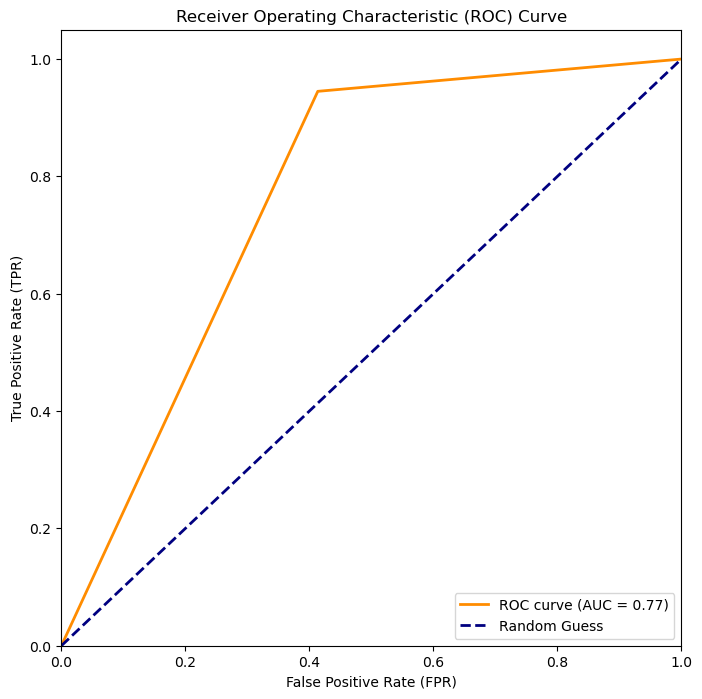

In [108]:
city = 'Eilat'
wind_data_class = np.apply_along_axis(np.vectorize(convert), -1, wind_data[city])

wind_data_train, wind_data_test = get_data_for_city(wind_data_class, 0.7)

train_windows_X, train_windows_y = get_windows_flat(wind_data_train)
test_windows_X, test_windows_y = get_windows_flat(wind_data_test)

train_windows_y = one_hot(np.array(train_windows_y).astype(int)).T

nnS = NeuralNetworkStructure(
    inputSize = 3, 
    outputSize = 2, 
    hiddenLayerSizes = [12], 
    hiddenLayerFunction = Sigmoid(), 
    outputLayerFunction = Softmax())

nn = NeuralNetwork(  
    epochs = 1000, 
    learningRate = 0.01,
    neuralNetworkStructure = nnS,
    lossFunction = CrossEntropy(),
    batchSize=32)

predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)
y_pred = np.argmax(predictedPoints, 0)
plot_roc_curve(test_windows_y, y_pred)

## Klasyfikacja - przewidywanie wiatru - wejście jako dane liczbowe

In [125]:
for city in cities:
    
    np.random.seed(0)

    wind_data_converted = convert_range(wind_data[city], -1, 1)
    humidity_data_converted = convert_range(humidity_data[city], -1, 1)
    pressure_data_converted = convert_range(pressure_data[city], -1, 1)

    data_train, data_test = get_full_data_for_city(wind_data_converted, humidity_data_converted, pressure_data_converted, 0.7)
    train_windows_X, _ = get_windows(data_train)
    test_windows_X, _ = get_windows(data_test)

    data_train_not_converted, data_test_not_converted = get_full_data_for_city(wind_data[city], humidity_data_converted, pressure_data_converted, 0.7)
    _, train_windows_y = get_windows(data_train_not_converted)
    _, test_windows_y = get_windows(data_test_not_converted)

    train_windows_y = np.apply_along_axis(np.vectorize(convert), -1, train_windows_y)
    test_windows_y = np.apply_along_axis(np.vectorize(convert), -1, test_windows_y)
    train_windows_y = one_hot(np.array(train_windows_y).astype(int)).T

    nnS = NeuralNetworkStructure(
        inputSize = 9, 
        outputSize = 2, 
        hiddenLayerSizes = [27], 
        hiddenLayerFunction = Sigmoid(), 
        outputLayerFunction = Softmax())

    nn = NeuralNetwork(  
        epochs = 1000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = CrossEntropy(),
        batchSize=32)

    predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)
    diff = np.argmax(predictedPoints, 0) == test_windows_y
    auc_val = calculate_auc(np.argmax(predictedPoints, 0), test_windows_y)
    print(f'{city}: Correct predictions: {np.sum(diff)}/{len(diff)} = {(np.sum(diff)/len(diff)*100).round(2)}%\t\t AUC:{auc_val.round(2)}')

Eilat: Correct predictions: 454/551 = 82.4%		 AUC:0.66
Montreal: Correct predictions: 382/551 = 69.33%		 AUC:0.5
Toronto: Correct predictions: 388/551 = 70.42%		 AUC:0.59
Chicago: Correct predictions: 375/551 = 68.06%		 AUC:0.58
Dallas: Correct predictions: 382/551 = 69.33%		 AUC:0.52
Albuquerque: Correct predictions: 388/551 = 70.42%		 AUC:0.66


## Klasyfikacja - przewidywanie wiatru - wejście godzinami

In [113]:
for city in cities:
    
    np.random.seed(0)

    wind_data_train, wind_data_test = get_data_for_city(wind_data[city], 0.7)
    wind_data_train_hourly, wind_data_test_hourly = get_data_for_city_count(wind_data_hourly[city], len(wind_data_train)*24)

    train_windows_X, train_windows_y = get_windows_hourly(wind_data_train_hourly, wind_data_train)
    test_windows_X, test_windows_y = get_windows_hourly(wind_data_test_hourly, wind_data_test)

    train_windows_y = np.apply_along_axis(np.vectorize(convert), -1, train_windows_y)
    test_windows_y = np.apply_along_axis(np.vectorize(convert), -1, test_windows_y)
    train_windows_y = one_hot(np.array(train_windows_y).astype(int)).T


    nnS = NeuralNetworkStructure(
        inputSize = 72, 
        outputSize = 2, 
        hiddenLayerSizes = [144], 
        hiddenLayerFunction = Sigmoid(), 
        outputLayerFunction = Softmax())

    nn = NeuralNetwork(  
        epochs = 1000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = CrossEntropy(),
        batchSize=32)

    predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)
    diff = np.argmax(predictedPoints, 0) == test_windows_y
    aucc = calculate_auc(np.argmax(predictedPoints, 0), test_windows_y)
    print(f'{city}: Correct predictions: {np.sum(diff)}/{len(diff)} = {(np.sum(diff)/len(diff)*100).round(2)}%\t\t AUC:{aucc.round(2)}')


Miami: Correct predictions: 288/551 = 52.27%		 AUC:0.48
Jerusalem: Correct predictions: 292/551 = 52.99%		 AUC:0.5
Los Angeles: Correct predictions: 350/551 = 63.52%		 AUC:0.5
Tel Aviv District: Correct predictions: 276/551 = 50.09%		 AUC:0.5
Haifa: Correct predictions: 295/551 = 53.54%		 AUC:0.54


## Klasyfikacja - przewidywanie wiatru - funkcje aktywacji

In [141]:
for city in cities:
    
    np.random.seed(0)

    wind_data_class = np.apply_along_axis(np.vectorize(convert), -1, wind_data[city])

    wind_data_train, wind_data_test = get_data_for_city(wind_data[city], 0.7)

    train_windows_X, train_windows_y = get_windows_flat(wind_data_train)
    test_windows_X, test_windows_y = get_windows_flat(wind_data_test)

    train_windows_y = np.apply_along_axis(np.vectorize(convert), -1, train_windows_y)
    test_windows_y = np.apply_along_axis(np.vectorize(convert), -1, test_windows_y)
    train_windows_y = one_hot(np.array(train_windows_y).astype(int)).T

    functions = [Sigmoid(), Tanh(), ReLU()]
    
    for function in functions:
        
        nnS = NeuralNetworkStructure(
            inputSize = 3, 
            outputSize = 2, 
            hiddenLayerSizes = [12], 
            hiddenLayerFunction = function, 
            outputLayerFunction = Softmax())

        nn = NeuralNetwork(  
            epochs = 1000, 
            learningRate = 0.01,
            neuralNetworkStructure = nnS,
            lossFunction = CrossEntropy(),
            batchSize=32)

        predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)
        diff = np.argmax(predictedPoints, 0) == test_windows_y
        auc_val = calculate_auc(np.argmax(predictedPoints, 0), test_windows_y)
        print(f'{city}: {function.getName()} Correct predictions: {np.sum(diff)}/{len(diff)}, {np.round(np.sum(diff)/len(diff)*100, 2)}%, AUC: {auc_val.round(2)}')

Eilat: Sigmoid Correct predictions: 461/551, 83.67%, AUC: 0.7
Eilat: Tanh Correct predictions: 463/551, 84.03%, AUC: 0.7
Eilat: ReLU Correct predictions: 429/551, 77.86%, AUC: 0.54
Montreal: Sigmoid Correct predictions: 382/551, 69.33%, AUC: 0.5
Montreal: Tanh Correct predictions: 386/551, 70.05%, AUC: 0.51
Montreal: ReLU Correct predictions: 386/551, 70.05%, AUC: 0.52
Toronto: Sigmoid Correct predictions: 372/551, 67.51%, AUC: 0.61
Toronto: Tanh Correct predictions: 397/551, 72.05%, AUC: 0.52
Toronto: ReLU Correct predictions: 396/551, 71.87%, AUC: 0.51
Chicago: Sigmoid Correct predictions: 375/551, 68.06%, AUC: 0.57
Chicago: Tanh Correct predictions: 388/551, 70.42%, AUC: 0.54
Chicago: ReLU Correct predictions: 376/551, 68.24%, AUC: 0.57
Dallas: Sigmoid Correct predictions: 387/551, 70.24%, AUC: 0.58
Dallas: Tanh Correct predictions: 386/551, 70.05%, AUC: 0.56
Dallas: ReLU Correct predictions: 376/551, 68.24%, AUC: 0.62
Albuquerque: Sigmoid Correct predictions: 405/551, 73.5%, AUC: 0

In [138]:
for city in cities:

    np.random.seed(0)

    prev_min = wind_data[city].min()
    prev_max = wind_data[city].max()

    wind_data_converted = convert_range(wind_data[city], -1, 1)
    humidity_data_converted = convert_range(humidity_data[city], -1, 1)
    pressure_data_converted = convert_range(pressure_data[city], -1, 1)

    data_train, data_test = get_full_data_for_city(wind_data_converted, humidity_data_converted, pressure_data_converted, 0.7)

    train_windows_X, train_windows_y = get_windows(data_train)
    test_windows_X, test_windows_y = get_windows(data_test)

    nnS = NeuralNetworkStructure(
        inputSize = 9, 
        outputSize = 1, 
        hiddenLayerSizes = [32], 
        hiddenLayerFunction = Tanh(), 
        outputLayerFunction = Linear())

    nn = NeuralNetwork(  
        epochs = 3000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = MAE(),
        batchSize=32)

    predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)

    converted = convert_range(np.array(test_windows_y), prev_min, prev_max)
    predictedPoints = convert_range(np.array(predictedPoints), prev_min, prev_max)
    diff = (converted >= 6) == (predictedPoints[0] >= 6) 
    y_pred = predictedPoints[0] >= 6
    auc_val = calculate_auc(y_pred, converted >= 6)
    print(f'{city}: Correct predictions: {np.sum(diff)}/{len(diff)}, {np.round(np.sum(diff)/len(diff)*100, 2)}%, AUC: {auc_val.round(2)}')

Eilat: Correct predictions: 423/551, 76.77%, AUC: 0.53
Montreal: Correct predictions: 458/551, 83.12%, AUC: 0.52
Toronto: Correct predictions: 338/551, 61.34%, AUC: 0.56
Chicago: Correct predictions: 386/551, 70.05%, AUC: 0.5
Dallas: Correct predictions: 530/551, 96.19%, AUC: 0.53
Albuquerque: Correct predictions: 401/551, 72.78%, AUC: 0.56


---
## Wykorzystywanie predykcji dla dnia dzisiejszego jako wejścia dla predykcji na jutro

In [198]:
cities = ['Eilat', 'Montreal', 'Toronto', 'Chicago', 'Dallas', 'Albuquerque']

for city in cities:
    
    np.random.seed(0)

    wind_data_class = np.apply_along_axis(np.vectorize(convert), -1, wind_data[city])

    wind_data_train, wind_data_test = get_data_for_city(wind_data_class, 0.7)

    train_windows_X, train_windows_y = get_windows_flat(wind_data_train)
    test_windows_X, test_windows_y = get_windows_flat(wind_data_test)

    train_windows_y = one_hot(np.array(train_windows_y).astype(int)).T

    nnS = NeuralNetworkStructure(
        inputSize = 3, 
        outputSize = 2, 
        hiddenLayerSizes = [12], 
        hiddenLayerFunction = ReLU(), 
        outputLayerFunction = Softmax())

    nn = NeuralNetwork(  
        epochs = 1000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = CrossEntropy(),
        batchSize=32)
    

    predictedPoints = nn.Test(train_windows_X, train_windows_y, train_windows_X + test_windows_X)
    y_pred = np.argmax(predictedPoints, 0)
    print(y_pred.mean())
    y_pred_for_train = y_pred[0:len(train_windows_X)]
    y_pred_for_test = y_pred[len(train_windows_X):]
    #diff = np.argmax(predictedPoints, 0) == test_windows_y
    #auc_val = calculate_auc(np.argmax(predictedPoints, 0), test_windows_y)
    #print(f'{city}: Correct predictions: {np.sum(diff)}/{len(diff)} = {(np.sum(diff)/len(diff)*100).round(2)}%\t\t AUC:{auc_val.round(2)}')

    # druga sieć
    train_windows_X = train_windows_X[1:]
    train_windows_y = train_windows_y[1:]
    for i in range(len(train_windows_X)):
        train_windows_X[i].append(y_pred_for_train[i])

    test_windows_X = test_windows_X[1:]
    test_windows_y = test_windows_y[1:]
    for i in range(len(test_windows_X)):
        test_windows_X[i].append(y_pred_for_test[i])

    nnS = NeuralNetworkStructure(
        inputSize = 4, 
        outputSize = 2, 
        hiddenLayerSizes = [16], 
        hiddenLayerFunction = Sigmoid(), 
        outputLayerFunction = Sigmoid())

    nn = NeuralNetwork(  
        epochs = 1000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = CrossEntropy(),
        batchSize=32)
    
    predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)
    diff = np.argmax(predictedPoints, 0) == test_windows_y
    auc_val = calculate_auc(np.argmax(predictedPoints, 0), test_windows_y)
    print(f'{city}: Correct predictions: {np.sum(diff)}/{len(diff)} = {(np.sum(diff)/len(diff)*100).round(2)}%\t\t AUC:{auc_val.round(2)}')



0.8024959305480195
Eilat: Correct predictions: 475/550 = 86.36%		 AUC:0.76
1.0
Montreal: Correct predictions: 381/550 = 69.27%		 AUC:0.5
0.6771568095496473
Toronto: Correct predictions: 400/550 = 72.73%		 AUC:0.57
0.8193163320672816
Chicago: Correct predictions: 394/550 = 71.64%		 AUC:0.57
0.8686923494302767
Dallas: Correct predictions: 381/550 = 69.27%		 AUC:0.56
0.3684210526315789
Albuquerque: Correct predictions: 377/550 = 68.55%		 AUC:0.65
